<font color = 'brown'  size = 3>
    
# 02 - Regresión Lineal en Inteligencia Artificial

<font color = 'purple'>
    
## 01 - Generando un conjunto de muestras

Se generará una serie de parejas ordenadas en el plano de la forma $(x_0,y_0), (x_1,y_1), ..., (x_n,y_n)$, las cuales representarán un conjunto de $n$ muestras.

Se importan las librerias de utilidad.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
%matplotlib inline

In [2]:
def generador_de_datos(pendiente, muestras, desviacion):
    
    '''La función genera las parejas ordenadas.
       INPUT: Pendiente de la recta, número de muestras y la desviación de los datos.
       OUTPUT: n parejas ordenadas para cada valor de x & y. '''
    
    np.random.seed(1)                                    # Se fija para que los valores sean reproducibles.
    x = np.random.random(muestras) * 10                  # x es un arreglo con n números aleatorios entre 0 y 100.
    error = np.random.randn(muestras) * desviacion       # error, es un error generado aleatoriamente.
    y = x * pendiente + error                            # Se obtienen los valores de y. 
    
    return x.reshape((muestras,1)), y.reshape((muestras,1))

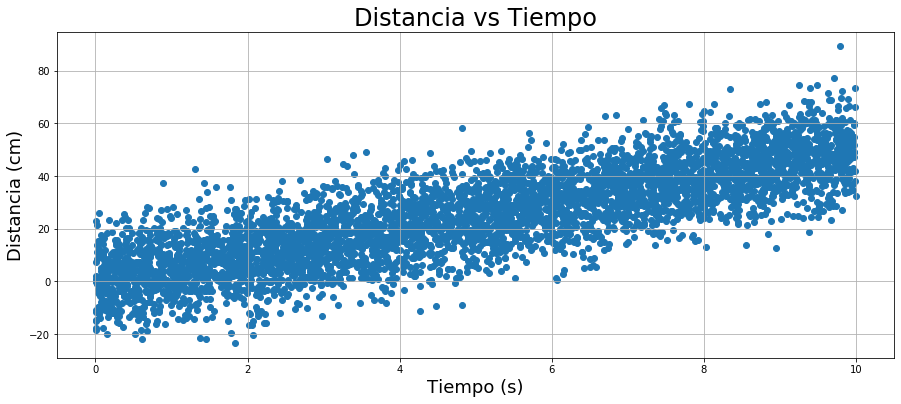

In [3]:
# Indicamos los valores necesarios para generar las muestras.
desviacion = 10
pendiente = 5
muestras = 5000   

# Obtenemos x & y.
x, y = generador_de_datos(pendiente, muestras, desviacion)

# Realizamos un gráfico:
plt.figure(figsize = (15, 6))
plt.scatter(x, y)
plt.grid(True)
plt.title('Distancia vs Tiempo', size = 24)    # Como ejemplo ilustrativo supongamos que son datos de distancia y tiempo. 
plt.xlabel('Tiempo (s)', size = 18)
plt.ylabel('Distancia (cm)', size = 18);

Generemos histogramas que nos indiquen la frecuencia de datos para cada valor tanto para tiempo como para distancia con el fin de tener otra visualización sobre la distribución de los datos.

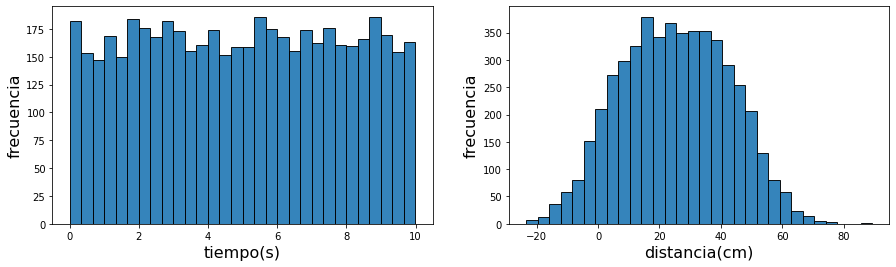

In [4]:
plt.figure(figsize = (15,4))

# Histograma para la frecuencia de datos de tiempo.
plt.subplot(1, 2, 1)
plt.hist(x, bins = 30, edgecolor = 'black', alpha = 0.9)
plt.xlabel('tiempo(s)', fontsize = 16)
plt.ylabel('frecuencia', fontsize = 16)

# Histograma para la frecuencia de datos de distancia.
plt.subplot(1, 2, 2)
plt.hist(y, bins = 30, edgecolor = 'black', alpha = 0.9)
plt.xlabel('distancia(cm)', fontsize = 16)
plt.ylabel('frecuencia', fontsize = 16);

<font color = 'purple'>
    
## 02 - Buscando la correlación que existe entre las muestras

Se requiere hallar una función $F$ que describa la correlación que existe entre el conjunto de muestras. En una primera aproximación $x$ (tiempo) es una variable independiente, mientras que $y$ (distancia) es dependiente de $x$.

Para encontrar la correlación entre las muestras se propone un conjunto de funciones definidas mediante la siguiente relación lineal:

$$F(x,w,b) = wx + b \tag{1}$$

Donde $x$, $w$, y $b$ son variables por determinar de acuerdo a la distribución de los datos. 

Se usa la letra $w$ por la palabra en inglés "weight" ya que está relacionada con el peso o importancia que tiene la variable $x$, mientras que $b$ se usa por la palabra "bias" y representa el sesgo o la referencia respecto al cero de la función $F$.

Para encontrar la función que describe la correlación entre las muestras, es necesario generar una métrica para describir qué tanto se acerca cada una de las funciones específicas (con valores definidos de $w$ y de $b$) a esta descripción.

Para cada muestra $(x_i, y_i)$ se evalua $F(x_i, w, b)$ y se compara con el correspondiente valor $y_i$, la diferencia entre estos valores se eleva al cuadrado.

$$ (y_i - F(x_i, w, b))^{2} \tag{2}$$ 

luego se calcula el promedio de este valor sobre todas las muestras, a dicha cantidad se le llama $\textit{error cuadrático medio}$ o por sus siglas en inglés $MSE$ ($\textit{Mean Squared Error}$). Si n es el número de muestras, el $MSE$ queda como:

$$ MSE = \dfrac {1}{n}∑_{i=1}^{n}(y_i - F(x_i, w, b))^{2} \tag{3}$$

En un primer caso la función lineal $F$ estará dada por la inicialización aleatoria del peso $w_0$ y el bias $b_0$

In [5]:
np.random.seed(1)                  # Se usa la semilla para obtener valores reproducibles.

# Inicialización aleatoria de los parámetros w y b de F, los valores están entre 0 y 10.
w_0 = np.random.random() * 10        
b_0 = np.random.random() * 10

# Imprimimos los valores iniciales de w y b (con 4 decimales).
print('w_0:', np.round(w_0, 4), '\n' 'b_0:', np.round(b_0, 4))

w_0: 4.1702 
b_0: 7.2032


Sobre la gráfica de muestras coloquemos el ajuste obtenido con los parámetros iniciales obtenidos.

Queremos que la línea de ajuste sea continua, para ello generaremos dos arreglos, uno para la variable $x$ que esté entre $0$ y $10$ y vaya en pasos de $0.1$ y otro arreglo para la función $F$ cuyos valores estarán dados usando los parámetros iniciales $w_0$ y $b_0$ así como los valores de $x$, esto de acuerdo a la ecuación $(1)$.

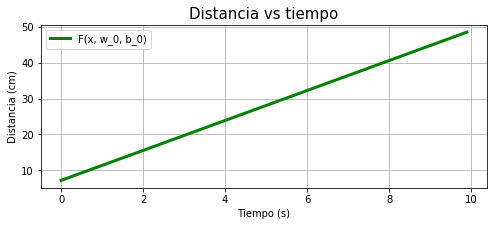

In [6]:
# Generación de los arreglos para obtener una línea continua representando la correlación de los datos:
x_ajuste = np.arange(0.0, 10.0, 0.1)    # Valores para x entre 0 y 10 a pasos de 0.1.
f_ajuste = (w_0 * x_ajuste) + b_0       # f es la función F(x, w, b) generada con w_0, b_0 y x_ajuste.

# Gráfica de la función determinada:
plt.figure(figsize = (8,3))
plt.grid(True)
plt.title('Distancia vs tiempo', size = 15)
plt.xlabel('Tiempo (s)', size = 10)
plt.ylabel('Distancia (cm)', size = 10);
plt.plot(x_ajuste, f_ajuste, color = 'green', lw = 3, label = 'F(x, w_0, b_0)') 
plt.legend()

Una vez determinada la función veamos que tan bien se ajusta a los datos, para ello calculemos el $MSE$ comparando la función obtenida $F$ con cada muestra de acuerdo a la ecuación ($3$).

MSE: 116.94328832073086


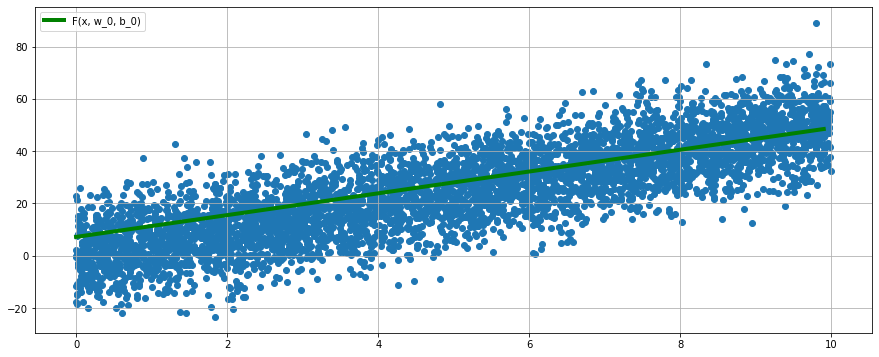

In [7]:
# Cálculo del MSE.
MSE = 0
for i in range(len(x)):              # Para cada muestra:
    r = (y[i] - (w_0 * x[i]) - b_0)**2
    MSE += np.squeeze(r)
MSE = MSE / len(x)
print('MSE:', MSE)

#Gráfica con las muestras y la función lineal obtenida:
plt.figure(figsize = (15,6))
plt.grid(True)
plt.plot(x_ajuste, f_ajuste, color = 'green', lw = 4, label = 'F(x, w_0, b_0)') 
plt.legend()
plt.scatter(x, y);                      

El ajuste mas óptimo será aquel en el que el $MSE$ sea mínimo, para lograrlo hay que ir modificando los parámetros $w$ y $b$ de manera que el MSE sea mínimo.

<font color = 'purple'>
    
## 03 - Método del Gradiente Descendente
   

Emplearemos el método de $\textbf{gradiente descendente}$ (Gradient Descent en inglés), este método nos indica que los parámetros $w$ y $b$ se deben actualizar de manera que el $MSE$ disminuya. La actualización se da de acuerdo a las siguientes reglas: 

$$ w := w - \alpha \dfrac{\partial}{\partial w}(MSE(w, b))  \tag{4}$$

$$ b := b - \alpha \dfrac{\partial}{\partial b}(MSE(w, b))   \tag{5}$$

Donde $\alpha$ es la taza de aprendizaje (learning rate) y es un hiperparámetro (una cantidad ajustada por nosotros) del modelo el cual controla la velocidad con la que el modelo aprenderá a ajustar los parámetros $w$ y $b$.

En este caso

$$ MSE(w, b) = \dfrac{1}{n}∑_{i=1}^{n}(y_i-f(x_i))^{2} = \dfrac{1}{n}∑_{i=1}^{n}(y_i - w x_i - b)^2   \tag{6}$$

Entonces

$$ \dfrac{\partial}{\partial w}(MSE(w, b)) = \dfrac{2}{n}∑_{i=1}^{n}[(w x_i + b -y_i)(x_i)]   \tag{7}$$

$$ \dfrac{\partial}{\partial b}(MSE(w, b)) = \dfrac{2}{n}∑_{i=1}^{n}[(w x_i + b -y_i)]    \tag{8}$$

La siguiente función realizará la actualización de los parámetros:

Nota: Para las derivadas del MSE con respecto a los parámetros $w$ y $b$ usaremos la siguiente simplificación de notación:

$$ dw = \dfrac{\partial}{\partial w}(MSE(w, b)) \tag{9}$$

$$ db = \dfrac{\partial}{\partial b}(MSE(w, b)) \tag{10}$$


In [8]:
def actualizar_parametros(x, y, w, b, alfa, iteraciones):
    
    '''Esta función actualiza los parámetros (w,b) usando el método del gradiente descendente.
    INPUT:
        x,y: muestras.
        w: peso inicial.
        b: bias inicial.
        alfa: taza de aprendizaje.
        iteraciones: Número de veces a actualizar los parámetros.
    OUTPUT:
        w_i: lista con los pesos actualizados en cada iteración.
        b_i: lista con los bias actualizados en cada iteración.
        MSE_i: lista con los valores del MSE actualizados en cada iteración.'''
    
    # 1. Inicializacion de parametros
    x = np.squeeze(x)
    y = np.squeeze(y)
    alfa = alfa                         # alfa será un hiperparámetro elegido por nosotros.
    MSE = 0
    dw = 0.0                        
    db = 0.0                        
    muestras = len(x)                   # Especifica el número de muestras.

    #2. Especificaciones de las gráficas
    plt.figure(figsize = (20,8))    
    ax1 = plt.subplot(1,3,1)
    ax2 = plt.subplot(1,3,2)
    ax3 = plt.subplot(1,3,3)
    ax1.grid(True)
    ax2.grid(True)
    ax3.grid(True)
    ax1.scatter(x, y)
    ax1.set_title('Distancia vs Tiempo', size = 24)
    ax1.set_xlabel('Tiempo', size = 18)
    ax1.set_ylabel('Distancia', size = 18)

    # Recta generada con los parametros iniciales.
    f = (w * x) + b                      # Ecuación (1).        
    ax1.plot(x, f, color ='green', lw=4)
    
    # 3. Se calcula el MSE.
    w_i = []                             # Se inicializan las listas de los pesos, bias y MSE que se irán actualizando.
    b_i = []
    MSE_i = []
    
    # Cálculo de las derivadas y el MSE.
    for i in range(iteraciones):
        for i in range(muestras):
            dw += 2 * ((w * x[i]) + b - y[i]) *x[i]      
            db += 2 * ((w * x[i]) + b - y[i])
            MSE += (y[i] - (w * x[i]) - b) ** 2
        MSE /= muestras
        dw /= muestras
        db /= muestras
        
        w_i.append(w)                    # Se agregan los valores calculados a la correspondiente lista.
        b_i.append(b)
        MSE_i.append(MSE)
        
    # 4. Actualización de los parametros y de la función.
        w = w - (alfa * dw)
        b = b - (alfa * db)
        f = (w * x) + b             # Recta generada con la actualizacion de los parametros 
        ax1.plot(x, f, lw = 4)

    # 5. Gráfica de los MSE´s como función del parámetro w.
        ax2.scatter(w, MSE)
        ax2.set_title('MSE vs w', size = 24)
        ax2.set_xlabel('w', size = 18)
        ax2.set_ylabel('MSE', size = 18)

    # 6. Gráfica de los MSE´s como función del parámetro b.
        ax3.scatter(b, MSE)
        ax3.set_title('MSE vs b', size = 24)
        ax3.set_xlabel('b', size = 18)
        ax3.set_ylabel('MSE', size = 18)

    return w_i, b_i, MSE_i

Inndicamos los valores necesarios para la función anterior:

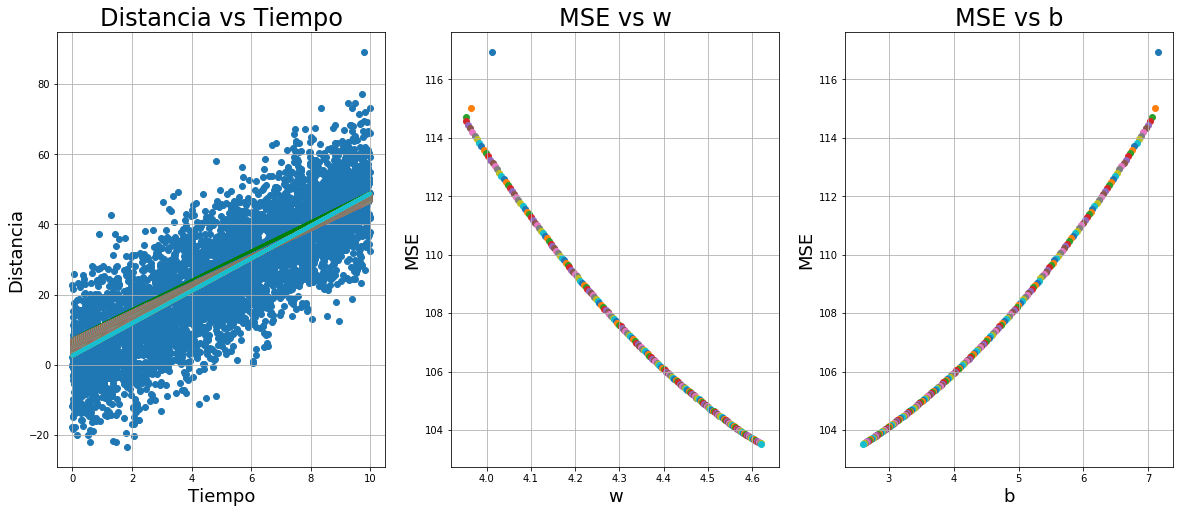

In [9]:
w = w_0                    # Comenzamos con los parámetros que ya inicializamos anteriormente.
b = b_0 
alfa = 0.01                # Elegimos una taza de aprendizaje de 0.01.
iteraciones = 200          # Elegimos 200 iteraciones.

w_iter, b_iter, MSE_iter = actualizar_parametros(x, y, w, b, alfa, iteraciones)

El objetivo es, que a medida que ocurren más iteraciones, la función $F$ se ajusta cada vez mejor a la distribución de los datos y eso se debe al decremento del valor del MSE. Con el algoritmo del gradiente descendete se lográ hallar el mínimo valor del MSE.

En las gráficas obtenidas se puede observar como disminuye el $MSE$ a medida que los parámetros $w$ y $b$ se van ajustando con el objetivo de hallar la función $F$ más óptima.

Veamos ahora cómo se ve graficamente la variación del MSE con respecto al número de iteraciones.

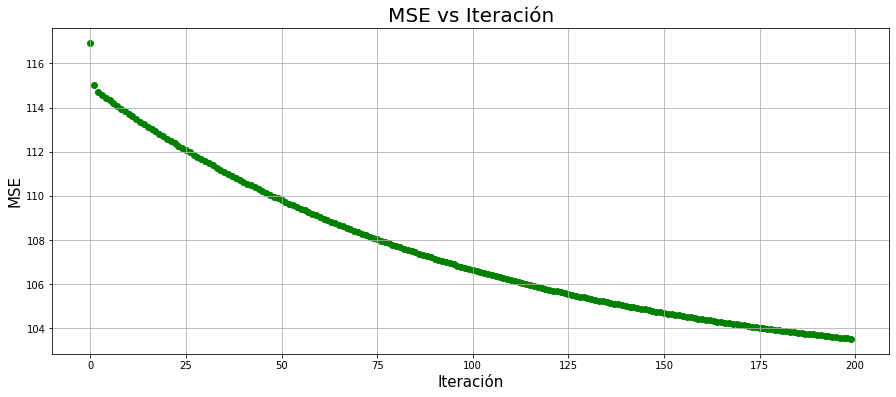

In [10]:
plt.figure(figsize = (15, 6))
plt.grid(True)
plt.scatter(range(iteraciones), MSE_iter, color = 'green')
plt.title('MSE vs Iteración', size = 20)
plt.xlabel('Iteración', size = 15)
plt.ylabel('MSE', size = 15);

Se puede observar que el MSE disminuye conforme más iteraciones ocurren, tal como lo esperabamos según el algoritmo del gradiente descendente.

En Machine Learning no sólo queremos hallar el mejor modelo que describa a nuestros datos, queremos que el modelo sea capaz de extrapolar y ser capaz de trabajar con nuevos datos y tener un buen rendimiento, es decir, tenga la capacidad de predecir el comportamiento de datos nunca vistos por el modelo, así que una parte importante es evaluar que tanto nuestro modelo está ajustado a los datos.

<font color = 'purple'>
    
## 04 - Evaluación del ajuste obtenido

En modelos de Machine Learning se usa un conjunto de datos que servirán como datos de prueba para evaluar que tan bien funciona el modelo entrenado con datos 'nuevos' y ver si es capaz de predecir su correlación. 

Dividamos en dos grupos nuestros datos, un conjunto con el 90% de datos mientras que el otro con un 10%, correspondiente a los datos restantes.

Con el fin de que los grupos no contengan datos con algún tipo de relación, vamos a crear los grupos de manera que los datos se vayan a cada grupo de manera aleatoria, para ello haremos uso de las funciones 'shuffle' y 'zip'. 

'shuffle' reordena los valores dentro de una lista de manera aleatoria y 'zip' permite hacer parejas ordenadas entre los valores de dos o más listas.

Para ver cómo funcionan y cuál es su efecto veamos el siguiente ejemplo:

In [11]:
# Generamos tres listas:
lista_1 = [1, 2, 3, 4, 5, 6]
lista_2 = [11, 12, 13, 14, 15, 16]
lista_3 = [21, 22, 23, 24, 25, 26]
print('lista 1: ', lista_1)
print('lista 2: ', lista_2)
print('lista 3: ', lista_3)

# Con 'shuffle' los valores de cada lista se redistribuyen de manera aleatoria.
shuffle(lista_1)
shuffle(lista_2)
shuffle(lista_3)
print('lista 1 modificada: ', lista_1)
print('lista 2 modificada: ', lista_2)
print('lista 3 modificada: ', lista_3)

# Hagamos uso de 'zip' para hacer conjuntos ordenados combinando los valores de cada lista según su posición.
lista_coordenadas = list(zip(lista_1, lista_2, lista_3))
print('Valores de las listas como coordenadas: ', lista_coordenadas)

# A las coordenadas le podemos aplicar 'shuffle' para reordenar los valores.
shuffle(lista_coordenadas)
print('Coordenadas reordenadas: ', lista_coordenadas)

# Volvemos a aplicar 'zip' para devolver a cada valor a su respectiva lista: 
(lista_1, lista_2, lista_3) = zip(*lista_coordenadas)
print(lista_1)
print(lista_2)
print(lista_3)

lista 1:  [1, 2, 3, 4, 5, 6]
lista 2:  [11, 12, 13, 14, 15, 16]
lista 3:  [21, 22, 23, 24, 25, 26]
lista 1 modificada:  [3, 4, 2, 6, 1, 5]
lista 2 modificada:  [15, 13, 12, 11, 16, 14]
lista 3 modificada:  [26, 23, 22, 24, 25, 21]
Valores de las listas como coordenadas:  [(3, 15, 26), (4, 13, 23), (2, 12, 22), (6, 11, 24), (1, 16, 25), (5, 14, 21)]
Coordenadas reordenadas:  [(5, 14, 21), (1, 16, 25), (4, 13, 23), (6, 11, 24), (3, 15, 26), (2, 12, 22)]
(5, 1, 4, 6, 3, 2)
(14, 16, 13, 11, 15, 12)
(21, 25, 23, 24, 26, 22)


Apliquemos dichas funciones a nuestro problema:

Se tienen 5000 muestras en total.
Se van a usar 4500 muestras para el ajuste.
Se van a usar 500 muestras para probar.


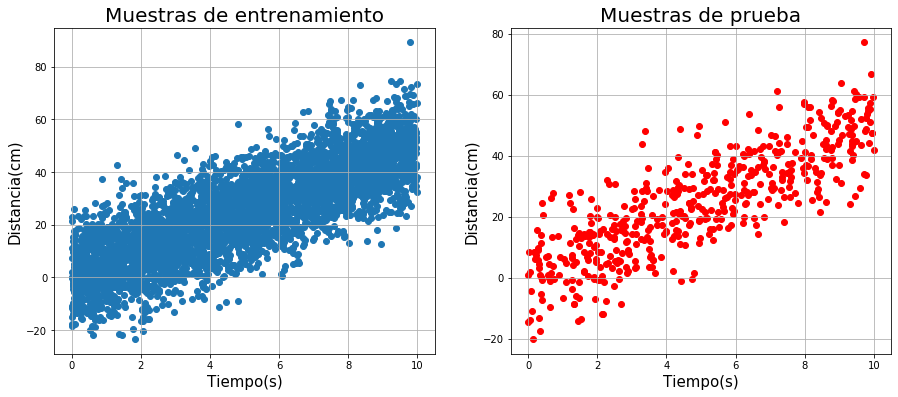

In [12]:
#1. Los datos se cambian de posición aleatoriamente
coordenadas = list(zip(x, y))       # se juntan las muestras: x e y ---> (x,y)
shuffle(coordenadas)                # se cambia el orden de las muestras (x,y)
(x, y) = zip(*coordenadas)          # se separan las muestras: (x,y)---> x e y
print('Se tienen', len(x), 'muestras en total.')

#2. Los datos se dividen
datos_entrenamiento = (x[0:int(0.90 * len(x))], y[0:int(0.90 * len(y))])          # Conjunto para entrenar el modelo.
print('Se van a usar', len(datos_entrenamiento[0]), 'muestras para el ajuste.')

datos_prueba = (x[int(0.90 * len(x)):], y[int(0.90 * len(y)):])                   # Conjunto para probar el modelo.
print('Se van a usar', len(datos_prueba[0]), 'muestras para probar.')

#3. Se grafican ambos conjuntos
plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plt.grid(True)
plt.scatter(datos_entrenamiento[0], datos_entrenamiento[1])
plt.title('Muestras de entrenamiento', size = 20)
plt.xlabel('Tiempo(s)', size = 15)
plt.ylabel('Distancia(cm)', size = 15)

plt.subplot(1, 2, 2)
plt.grid(True)
plt.scatter(datos_prueba[0], datos_prueba[1], color = 'red')
plt.title('Muestras de prueba', size = 20)
plt.xlabel('Tiempo(s)', size = 15)
plt.ylabel('Distancia(cm)', size = 15);

Para tener un mejor resultado en conveniente normalizar los datos.

Si se normalizan con 3 veces la desviacion estandar, el 99.7% de los datos tendrán valores entre -1 y 1. El rango con que se normaliza tambien se puede variar entre una desviación o dos desviaciones estandar. En el primer caso el 68 % de los datos tendrán valores entre -1 y 1, mientras que en el segundo caso este rango correspondera al 95 % de los datos.

Separemos las muestras:

In [13]:
# Trabajemos con los datos de entrenamiento:
x_ajustar = datos_entrenamiento[0]          # Valores de entrada (Tiempo).
y_ajustar = datos_entrenamiento[1]          # Valores de salida (Distancia).

### Normalizando con una desviación estandar

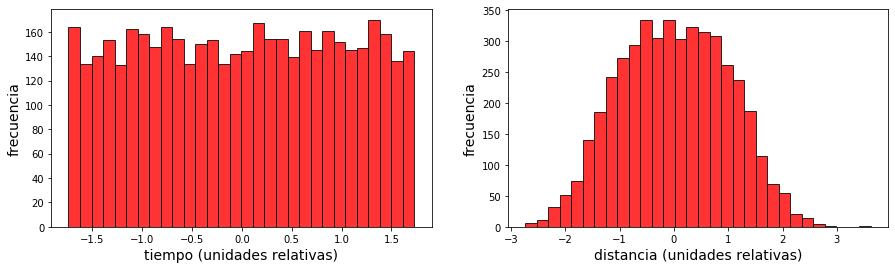

In [14]:
# Normalización de las muestras con una desviación estandar:
x_1 = (x_ajustar - np.mean(x_ajustar)) / (1.0 * np.std(x_ajustar))
y_1 = (y_ajustar - np.mean(y_ajustar)) / (1.0 * np.std(y_ajustar))

# Histogramas de las muestras.
plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.hist(x_1, bins = 30, color = 'red', edgecolor = 'black', alpha = 0.8)
plt.xlabel('tiempo (unidades relativas)', fontsize = 14)
plt.ylabel('frecuencia',fontsize = 14)

plt.subplot(1, 2, 2)
plt.hist(y_1, bins = 30,color = 'red', edgecolor = 'black', alpha = 0.8)
plt.xlabel('distancia (unidades relativas)',fontsize = 14)
plt.ylabel('frecuencia',fontsize = 14);

### Normalizando con dos desviaciones estandar

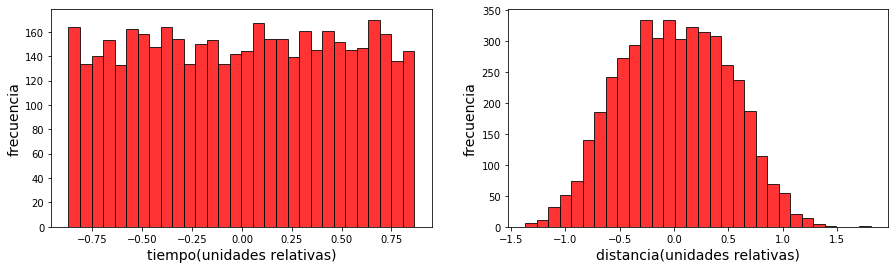

In [15]:
# Normalización de las muestras con dos desviaciones estandar:
x_2 = (x_ajustar - np.mean(x_ajustar)) / (2.0 * np.std(x_ajustar))
y_2 = (y_ajustar - np.mean(y_ajustar)) / (2.0 * np.std(y_ajustar))

# Histogramas de las muestras.
plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.hist(x_2, bins = 30, color = 'red', edgecolor = 'black', alpha = 0.8)
plt.xlabel('tiempo(unidades relativas)', fontsize = 14)
plt.ylabel('frecuencia',fontsize = 14)

plt.subplot(1, 2, 2)
plt.hist(y_2, bins = 30, color = 'red', edgecolor = 'black', alpha = 0.8)
plt.xlabel('distancia(unidades relativas)',fontsize = 14)
plt.ylabel('frecuencia',fontsize = 14);

### Normalizando con tres desviaciones estandar

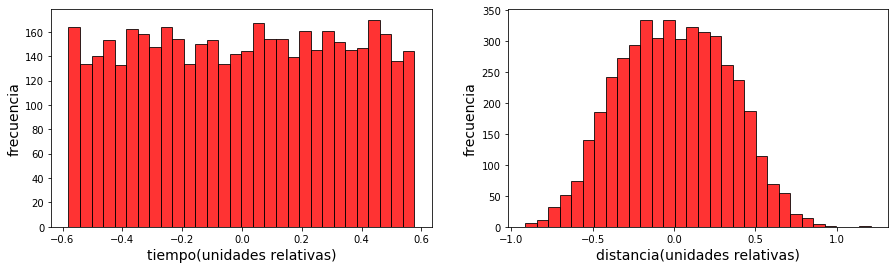

In [16]:
# Normalización de las muestras con tres desviaciones estandar:
x_3 = (x_ajustar - np.mean(x_ajustar)) / (3.0 * np.std(x_ajustar))
y_3 = (y_ajustar - np.mean(y_ajustar)) / (3.0 * np.std(y_ajustar))

# Histogramas de las muestras.
plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.hist(x_3, bins = 30, color = 'red', edgecolor = 'black', alpha = 0.8)
plt.xlabel('tiempo(unidades relativas)', fontsize = 14)
plt.ylabel('frecuencia',fontsize = 14)

plt.subplot(1, 2, 2)
plt.hist(y_3, bins = 30, color = 'red', edgecolor = 'black', alpha = 0.8)
plt.xlabel('distancia(unidades relativas)',fontsize = 14)
plt.ylabel('frecuencia',fontsize = 14);

Usando tres desviaciones estándar la mayoria de los datos caen en el rango de (-1,1). Trabajemos entonces con la normalización usando tres desviaciones estandar.

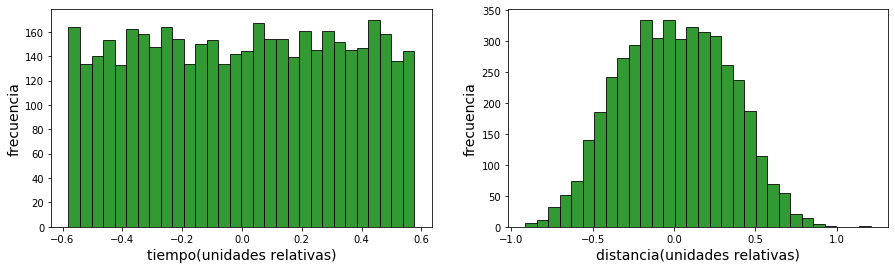

In [17]:
# Dividimos los datos de entrenamiento en las entradas x y salida y.
datos_entrenamiento_x = datos_entrenamiento[0]  
datos_entrenamiento_y = datos_entrenamiento[1]  

# Calculamos el promedio y desviación para normalizar nuestros datos.
tiempo_promedio = np.mean(datos_entrenamiento_x)
tiempo_desviacion = np.std(datos_entrenamiento_x)
distancia_promedio = np.mean(datos_entrenamiento_y)
distancia_desviacion = np.std(datos_entrenamiento_y)

# Normalizamos los datos con tres desviaciones estandar.
datos_entrenamiento_normalizados_x = (datos_entrenamiento_x - tiempo_promedio) / (3.0 * tiempo_desviacion)
datos_entrenamiento_normalizados_y = (datos_entrenamiento_y - distancia_promedio) / (3.0 * distancia_desviacion)

# Histogramas de las muestras.
plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.hist(datos_entrenamiento_normalizados_x, bins = 30, color = 'green', edgecolor = 'black', alpha = 0.8)
plt.xlabel('tiempo(unidades relativas)', fontsize = 14)
plt.ylabel('frecuencia',fontsize = 14)

plt.subplot(1, 2, 2)
plt.hist(datos_entrenamiento_normalizados_y, bins = 30, color = 'green', edgecolor = 'black', alpha = 0.8)
plt.xlabel('distancia(unidades relativas)',fontsize = 14)
plt.ylabel('frecuencia',fontsize = 14);

Se vuelve a correr el ajuste de datos empleando el metodo de gradiente descendente, pero ahora usando sólo el conjunto de datos de entrenamiento correspondiente al 90 % del total de datos.

Peso inicial:  0.417022004702574
Bias inicial:  0.7203244934421581


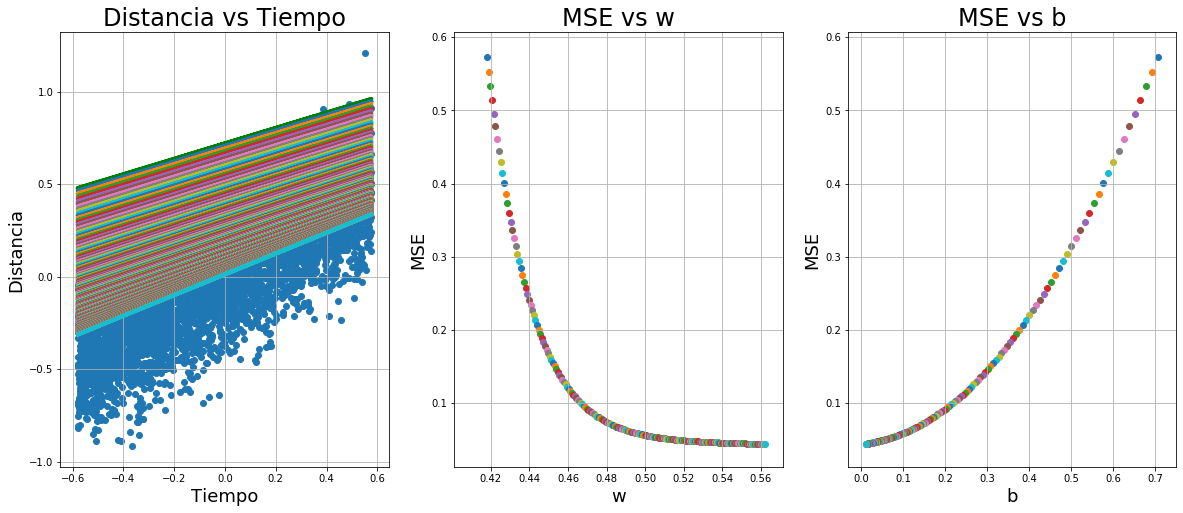

In [18]:
np.random.seed(1)

# Ahora los valores de los parámetros de inicialización están entre 0 y 1.
w_0 = np.random.random()
b_0 = np.random.random()
alfa = 0.01
iteraciones = 200
print('Peso inicial: ', w_0)
print('Bias inicial: ', b_0)

w_entrenamiento, b_entrenamiento, MSE_entrenamiento = actualizar_parametros(datos_entrenamiento_normalizados_x, 
                                                                datos_entrenamiento_normalizados_y, 
                                                                w_0, b_0, alfa, iteraciones)

Gráficamos el MSE en función del número de iteraciones.

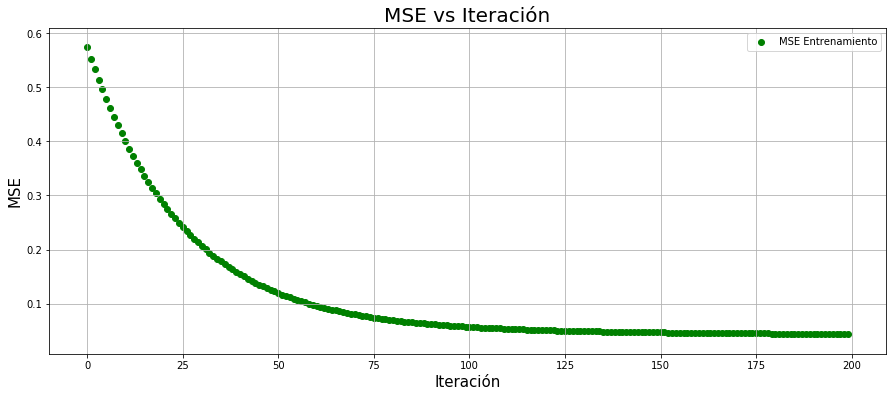

In [19]:
plt.figure(figsize = (15, 6))
plt.grid(True)
plt.scatter(range(iteraciones), MSE_entrenamiento, color = 'green')
plt.title('MSE vs Iteración', size = 20)
plt.xlabel('Iteración', size = 15)
plt.ylabel('MSE', size = 15)
plt.legend(['MSE Entrenamiento'],loc = 0);

Los parámetros $\hat{w}$, $\hat{b}$ óptimos y el $MSE$ mínimo son los siguientes:

In [20]:
MSE_minimo = MSE_entrenamiento[-1]
w_optimo = w_entrenamiento[-1]
b_optimo = b_entrenamiento[-1]
print('El valor óptimo del peso es:                   ', w_optimo)
print('El valor óptimo del bias es:                   ', b_optimo)
print('El MSE mínimo obtenido en el entrenamiento es: ', MSE_minimo)

El valor óptimo del peso es:                    0.5614041822847122
El valor óptimo del bias es:                    0.012915737662430725
El MSE mínimo obtenido en el entrenamiento es:  0.043934339037947065


Realicemos una función que nos permita obtener el valor del residuo usando los valores óptimos de los parámetros $w$ y $b$ obtenidos en el entrenamiento. 

In [21]:
def residuo(x, y, w, b):
    residuo = 0                             
    muestras = len(x)                       
    for i in range(muestras):
        residuo += (y[i] - w * x[i] - b) ** 2
    residuo /= muestras  
    return residuo

Veamos que resultado obtenemos del residuo usando la función anterior:

In [22]:
residuo_entrenamiento = np.squeeze(residuo(datos_entrenamiento_normalizados_x, datos_entrenamiento_normalizados_y,
                     w_entrenamiento[-1], b_entrenamiento[-1]))
print('El residuo obtenido en el entrenamiento es: ', residuo_entrenamiento)

El residuo obtenido en el entrenamiento es:  0.043924566922855825


Con los valores óptimos $\hat{w}$ y $\hat{b}$ vamos a calcular el residuo para el conjunto de prueba que contiene el 10 % de los datos originales.

Para que todo esté correcto es necesario normalizar los datos de prueba, es necesario que la normalización sea con los valores de promedio y desviación estandar obtenidos con el conjunto de entrenamiento.

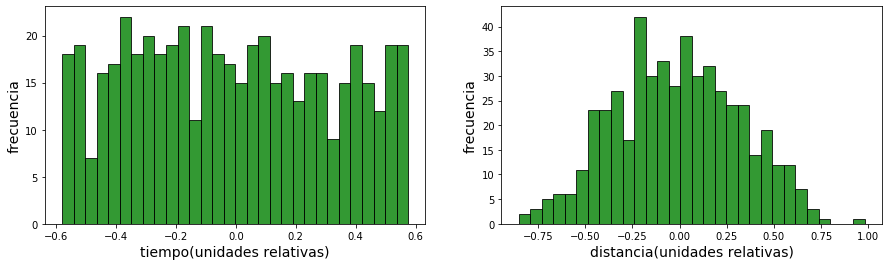

In [23]:
# Dividimos los datos de prueba en las entradas x y salida y.
datos_prueba_x = datos_prueba[0]  
datos_prueba_y = datos_prueba[1]  

# Los datos se van a normalizar utilizando el promedio y desviación de los datos de entrenamiento.
datos_prueba_normalizados_x = (datos_prueba_x - tiempo_promedio) / (3.0 * tiempo_desviacion)
datos_prueba_normalizados_y = (datos_prueba_y - distancia_promedio) / (3.0 * distancia_desviacion)

# Histogramas de las muestras.
plt.figure(figsize = (15, 4))

plt.subplot(1, 2, 1)
plt.hist(datos_prueba_normalizados_x, bins = 30, color = 'green', edgecolor = 'black', alpha = 0.8)
plt.xlabel('tiempo(unidades relativas)', fontsize = 14)
plt.ylabel('frecuencia',fontsize = 14)

plt.subplot(1, 2, 2)
plt.hist(datos_prueba_normalizados_y, bins = 30, color = 'green', edgecolor = 'black', alpha = 0.8)
plt.xlabel('distancia(unidades relativas)',fontsize = 14)
plt.ylabel('frecuencia',fontsize = 14);

In [24]:
residuo_prueba = np.squeeze(residuo(datos_prueba_normalizados_x, datos_prueba_normalizados_y,
                     w_entrenamiento[-1], b_entrenamiento[-1]))
print('El residuo obtenido con los datos de prueba es: ', residuo_prueba)

El residuo obtenido con los datos de prueba es:  0.04264742225941208


<font color = 'purple'>
    
## 05 - Otra forma de evaluar el ajuste obtenido

Vamos a crear una versión modificada de la función 'actualizar_parametros' la cual permita determinar la cantidad de datos que se repartiran en el conjunto de entrenamiento y el conjunto de prueba, también que normalice los datos y que finalmente calcule el $MSE$ de ambos conjuntos. 

In [25]:
def actualizacion_de_parametros(x, y, w, b, alfa, iteraciones, tamaño_validacion):
    
    '''Esta función actualiza los parámetros w y b usando el método del gradiente descendente.
       Además separa los datos en dos conjuntos: entrenamiento y prueba.
     INPUT
        x,y: muestras.
        w: peso inicial.
        b: bias inicial.
        alfa: taza de aprendizaje.
        iteraciones: Número de veces a actualizar los parámetros.
        tamaño_validacion: Porcentaje de los datos que se usarán como conjunto prueba.
     OUTPUT:
        w_i: Lista con los pesos actualizados en cada iteración.
        b_i: Lista con los bias actualizados en cada iteración.
        MSE_entrenamiento: Lista con los MSE actualizados en cada iteración para el conjunto de entrenamiento.
        MSE_validacion: Lista con los MSE actualizados en cada iteración para el conjunto de validación.'''
    
    # 1. Inicialización de los parámetros.
    x = np.squeeze(x)
    y = np.squeeze(y)
    alfa = alfa
    MSE = 0
    dw = 0.0
    db = 0.0
    muestras = len(x)

    # 2. Especificaciones de las gráficas.
    plt.figure(figsize = (15, 6)) 
    plt.title('MSE vs Iteraciones', size = 24)
    plt.xlabel('Iteración', size = 18)
    plt.ylabel('MSE', size = 18)
    
    # 3. Se dividen las muestras en los conjuntos de entrenamiento y validación.
    tamaño_entrenamiento = int((1.0 - tamaño_validacion) * muestras)
    
    datos_entrenamiento = (x[0:tamaño_entrenamiento], y[0:tamaño_entrenamiento])
    datos_validacion = (x[tamaño_entrenamiento:], y[tamaño_entrenamiento:])
    
    entrenamiento_x = datos_entrenamiento[0]
    entrenamiento_y = datos_entrenamiento[1]
    validacion_x = datos_validacion[0]
    validacion_y = datos_validacion[1]
    
    # 4. Normalización de los datos.
    promedio_x = np.mean(entrenamiento_x)
    desviacion_x = np.std(entrenamiento_x)
    
    promedio_y = np.mean(entrenamiento_y)
    desviacion_y = np.std(entrenamiento_y)
    
    x_entrenamiento = (entrenamiento_x - promedio_x) / desviacion_x
    y_entrenamiento = (entrenamiento_y - promedio_y) / desviacion_y
    x_validacion = (validacion_x - promedio_x) / desviacion_x
    y_validacion = (validacion_y - promedio_y) / desviacion_y

    # 5. Cálculo del MSE.
    w_i = []
    b_i = []
    MSE_entrenamiento = []
    MSE_validacion = []
    
    muestras_ajuste = len(x_entrenamiento)                     # numero de muestras para el ajuste
    muestras_validacion = len(x_validacion)                    # numero de muestras para validar
    
    for i in range(iteraciones):

        # calculo de derivadas y el residuo
        MSE_e = 0.0
        MSE_v = 0.0
        
        for j in range(muestras_ajuste):

            dw += 2 * (w * x_entrenamiento[j] + b - y_entrenamiento[j]) * x_entrenamiento[j]
            db += 2 * (w * x_entrenamiento[j] + b - y_entrenamiento[j])
            MSE_e += (y_entrenamiento[j] - w * x_entrenamiento[j] - b) ** 2

        MSE_e /= muestras_ajuste
        dw /= muestras_ajuste
        db /= muestras_ajuste
        
        #calculo del MSE de las muestras de validación
        
        for j in range(muestras_validacion):
            MSE_v += (y_validacion[j] - w * x_validacion[j] - b) ** 2
        MSE_v /= muestras_validacion
                      
        w_i.append(w)             # se agregan los valores calculados a las listas
        b_i.append(b)
        MSE_entrenamiento.append(MSE_e)
        MSE_validacion.append(MSE_v)
        
        #5. Actualizacion de los parametros

        w = w - alfa * dw
        b = b - alfa * db
        
        #6. Graficas del residuo en función de la iteración
        
        plt.grid(True)
        plt.scatter(i, MSE_e, color='blue')
        plt.scatter(i, MSE_v, color='orange')
    plt.legend(['residuo', 'residuo_val'],loc=0);


    return w_i, b_i, MSE_entrenamiento, MSE_validacion, promedio_x, desviacion_x, promedio_y, desviacion_y

Determinamos los valores iniciales:

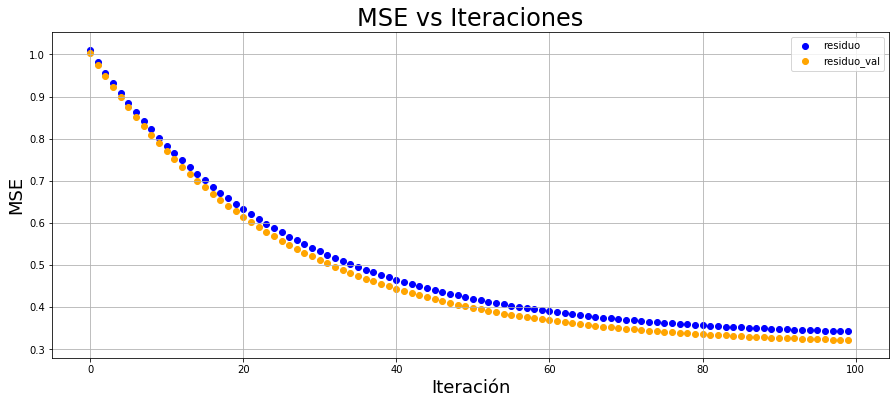

In [26]:
np.random.seed(1)
w_0 = np.random.random()
b_0 = np.random.random()
alfa = 0.01
iteraciones = 100         
tamaño_validacion = 0.2    # 80% de datos para el entrenamiento y 20% de datos para la prueba.

w_i, b_i, MSE_entrenamiento, MSE_validacion, promedio_x, desviacion_x, promedio_y, desviacion_y = actualizacion_de_parametros\
        (datos_entrenamiento_x, datos_entrenamiento_y, w_0, b_0, alfa, iteraciones, tamaño_validacion)

In [27]:
MSE_entrenamiento_minimo = MSE_entrenamiento[-1]
MSE_validacion_minimo = MSE_validacion[-1]
print('El MSE mínimo para el conjunto de entrenamiento es: ', MSE_entrenamiento_minimo)
print('El MSE mínimo para el conjunto de prueba es:        ',MSE_validacion_minimo)

El MSE mínimo para el conjunto de entrenamiento es:  0.3417581602070103
El MSE mínimo para el conjunto de prueba es:         0.3213281997203823


<font color = 'purple'>
    
## 06 - Inferencia

Con los resultados obtenidos podemos hacer inferencias. Dado un valor para el tiempo $x$ se puede obtener una inferencia (predicción) del valor de la distancia $y$. 

In [28]:
def inferencia(t, w, b, promedio_t, desviacion_t, promedio_y, desviacion_y) :
    t = (t - promedio_t) / desviacion_t 
    d = (w * t) + b
    d = (d * desviacion_y) + promedio_y
    return d

In [29]:
tiempos = [1.65, 2.20, 4.5, 8.7]

for t in tiempos :
    distancia = inferencia(t, w_i[-1], b_i[-1], promedio_x, desviacion_x, promedio_y, desviacion_y)
    print ("Para el tiempo de {0:5.3f} s la distancia inferida es {1:6.3f} cm ".format(t,distancia))

Para el tiempo de 1.650 s la distancia inferida es 10.955 cm 
Para el tiempo de 2.200 s la distancia inferida es 13.542 cm 
Para el tiempo de 4.500 s la distancia inferida es 24.359 cm 
Para el tiempo de 8.700 s la distancia inferida es 44.111 cm 


Se puede observar que con el ajuste de la función al conjunto de puntos $(x_{i}, y_{i})$ se pueden hacer predicciones de valores de distancia ($y$) dado algún tiempo ($x$), es decir, el sistema 'aprendió' la correlación entre las $x_{i}$ y las $y_{i}$, es capaz de hacer prediciones.

<font color = 'purple'>
    
# Inteligencia Artificial

Con lo desarrollado hasta ahora pasemos al formalismo de la Inteligencia Artificial.

En inteligencia artificial, un sistema es inteligente cuando después de ser entrenado con información que le es suministrada, es capaz de hacer inferencias.

Dada la dinámica en Inteligencia Artificial a nivel mundial comencemos por emplear la nomenclatura estándar que se emplea.

Al analizar una área de estudio se deben encontrar las conceptos que la identifican, se hace una cuantificación de estos conceptos definiendo variables que identifican a cada uno de ellos. Existe un conjunto de estas variables $X$ que son independientes y que determinan al resto de las variables $Y$ y se obtiene un conjunto de $m$ muestras de estas variables. Se genera un sistema de aprendizaje al cual se le suministran las muestras, con esta información el sistema aprende y puede hacer inferencias. Por ejemplo, si se le presenta un nuevo dato $X$ del área de estudio, el sistema puede predecir (inferir) los correspondientes valores de la variable Y.

En inteligencia artificial las datos totales son divididos en dos o tres conjuntos conocidos como conjunto de entrenamiento (train set), conjunto de prueba (test set) y en ocaciones conjunto de validación (validation set). No existe una regla general para indicar que porcentaje de datos corresponde a cada conjunto sin embargo en necesario que el conjunto de entrenamiento contenga un máyor número de datos que los otros dos, la cantidad de datos en cada conjunto también depende de la cantidad de datos totales de los que disponemos así como de la complejidad del sistema que se esté realizando.

Básicamente, el conjunto de entrenamiento corresponde a los datos que serán suministrados al sistema para que 'aprenda', los datos del conjunto de validación servirán para ver el funcionamiento del sistema con nuevos datos (datos no vistos por el sistema) y ajustar lo necesario para que el sistema mejore y finalmente sea puesto a prueba justamente con los datos del conjunto de prueba y deducir si el sistema de aprendizaje fue capaz de hacer inferencias sobre los nuevos datos así como evaluar su desempeño.

Realicemos el mismo ejercicio visto pero ahora lo traduciremos a un sistema de aprendizaje artificial. El área que analizamos corresponde al movimiento de un cuerpo, esta área la caracterizamos por los conceptos de tiempo y distancia, definimos la variable $x$ para representar el tiempo y la variable $y$ para representar a la distancia.

El ejercicio consiste en analizar el moviento de un cuerpo, se han obtenido $m$ muestras representadas por las variables, cada muestra de representa por la dupla $(x_i, y_i)$. El sistema de aprendizaje consiste en que se capaz de identificar la relación que existe entre las variables mediante una función de ajuste $y = F(x)$. Esta función puede tener diferentes formas, por ejemplo:
    
$$F(x,w,b) = w x + b$$
    
$$ F(x,w,b) = 1.7159 * tanh(wx + b) $$
    
$$ F(x,w,b) = Artificial-Neural-Network(ANN)$$
    
$$ F(x,w,b) = Supported-Vector-Machine(SVM)$$
    
$$ F(x,w,b) = Decision-Tree $$
   
$$ F(x,w,b) = Decision-Forest $$
    
entre otros.   

En este caso, dada la simplicidad de nuestros datos, la relación que se propone es una relación lineal descrita por la función: $$F(x,w,b) = wx + b$$ En el contexto de la inteligencia artificial significa que nuestro problema se resuelve con una regresión lineal (Lineal Regression).

<font color = 'purple'>
    
## 07 - Regresión lineal 

Generamos nuestro conjunto de muestras:

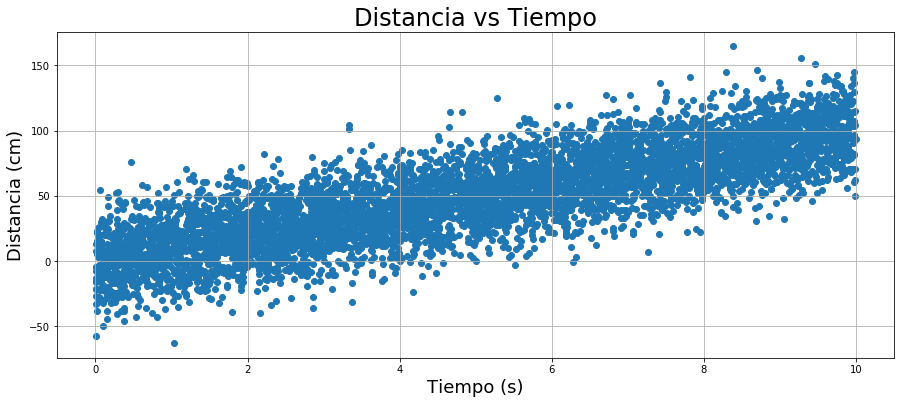

In [30]:
# Generamos las muestras usando la función 'generador_de_datos' que ya realizamos en el inicio.
# Indicamos los valores necesarios para generar las muestras.
desviacion = 20
pendiente = 10
muestras = 6000   


# Obtenemos x & y.
x, y = generador_de_datos(pendiente, muestras, desviacion)

# Realizamos un gráfico:
plt.figure(figsize = (15, 6))
plt.scatter(x, y)
plt.grid(True)
plt.title('Distancia vs Tiempo', size = 24)    
plt.xlabel('Tiempo (s)', size = 18)
plt.ylabel('Distancia (cm)', size = 18);

Generamos los histogramas de las muestras:

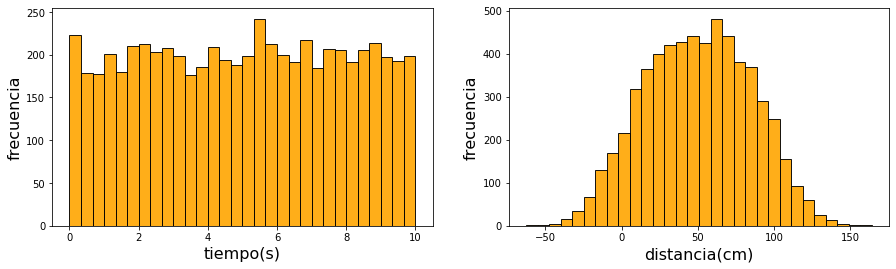

In [31]:
plt.figure(figsize = (15,4))

# Histograma para la frecuencia de datos de tiempo.
plt.subplot(1, 2, 1)
plt.hist(x, bins = 30, color = 'orange', edgecolor = 'black', alpha = 0.9)
plt.xlabel('tiempo(s)', fontsize = 16)
plt.ylabel('frecuencia', fontsize = 16)

# Histograma para la frecuencia de datos de distancia.
plt.subplot(1, 2, 2)
plt.hist(y, bins = 30, color = 'orange', edgecolor = 'black', alpha = 0.9)
plt.xlabel('distancia(cm)', fontsize = 16)
plt.ylabel('frecuencia', fontsize = 16);

En nuestro caso dividiremos los datos en dos conjuntos, el conjunto de entrenamiento con el 90% de los datos y el conjuneot de validación con el restante 10%.

Se tienen 6000 muestras en total.
Se van a usar 5400 muestras para el entrenamiento.
Se van a usar 600 muestras para probar.


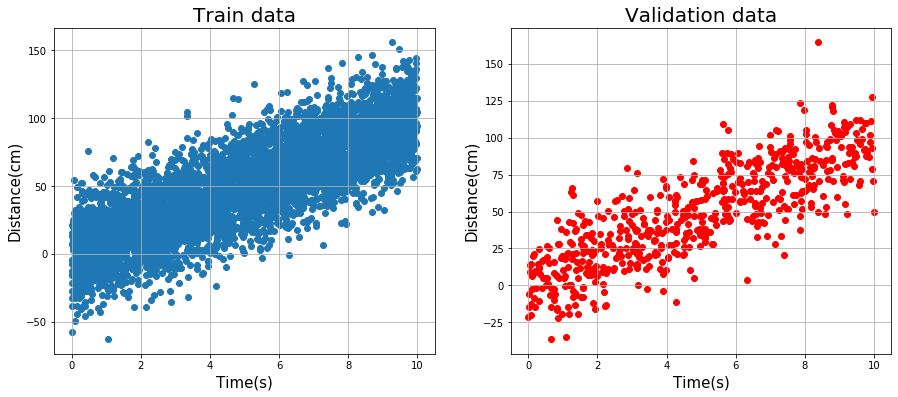

In [35]:
#1. Los datos se cambian de posición aleatoriamente
from random import shuffle

c = list(zip(x, y))    # Se juntan las muestras: x e y ---> (x,y)
shuffle(c)             # Se cambia el orden de las muestras (x,y)
(x, y) = zip(*c)       # Se separan las muestras: (x,y)---> x e y

print('Se tienen', len(x), 'muestras en total.')

#2. Los datos se dividen
data_train = (x[0:int(0.90*len(x))], y[0:int(0.90*len(y))])
print('Se van a usar', len(data_train[0]), 'muestras para el entrenamiento.')

data_val = (x[int(0.90*len(x)):], y[int(0.90*len(y)):])
print('Se van a usar', len(data_val[0]), 'muestras para probar.')

#3. Se grafican ambos conjuntos
plt.figure(figsize = (15, 6))

plt.subplot(1, 2, 1)
plt.grid(True)
plt.scatter(data_train[0], data_train[1])
plt.title('Train data', size = 20)
plt.xlabel('Time(s)', size = 15)
plt.ylabel('Distance(cm)', size = 15)

plt.subplot(1, 2, 2)
plt.grid(True)
plt.scatter(data_val[0], data_val[1], color = 'red')
plt.title('Validation data', size = 20)
plt.xlabel('Time(s)', size = 15)
plt.ylabel('Distance(cm)', size = 15);

Generamos la función "training" que contiene la arquitectura que emplearemos para entrenar el sistema de aprendizaje, en ella estableceremos la métrica que emplearemos para obtener el entrenamiento, ejecutaremos el entrenamiento y generaremos las gráficas del costo como función de la época. 

In [41]:
def training(x_train, y_train, weight, bias, alpha, epochs, val_ratio = 0.1):
    
    '''
    Esta función actualiza los parámetros (w,b) usando gradient descent
    Además separa a x e y en dos conjuntos: train y validation usando el val_ratio
    INPUT:
        x,y: muestras
        weight:    peso inicial
        bias:      bias inicial
        alfa:      learning rate
        epochs:    define el número de veces a actualizar a los parámetros.
        val_ratio: porcentaje de los datos (x,y) a usar como conjunto de validación.
    OUTPUT:
        weights:   lista con los pesos actualizados en cada iteración.
        biases:    lista con los bias actualizados en cada iteración.
        costs:     lista con los residuos actualizados en cada iteración para el conjunto de entrenamiento
        costs_val: lista con los residuos actualizados en cada iteración para el conjunto de validación'''
    
    # 1. Inicialización de los parámetros.
    x = np.squeeze(x_train)
    y = np.squeeze(y_train)
    alpha = alfa
    costs = 0
    d_w = 0.0
    d_b = 0.0
    m = len(x)

    # 2.  Especificaciones de las gráficas.
    plt.figure(figsize = (15,6)) 
    plt.title('Cost vs Epoch', size = 24)
    plt.xlabel('Epoch', size = 18)
    plt.ylabel('Cost', size = 18)
    
    # 3. Separación de muestras en los conjuntos train y validation
    
    train_ratio = int((1.0 - val_ratio) * m)  
   
    samples_train = (x[0:train_ratio], y[0:train_ratio])
    samples_val = (x[train_ratio:], y[train_ratio:])
    x = samples_train[0]
    y = samples_train[1]
    x_val = samples_val[0]
    y_val = samples_val[1]
    
    # 3.1 Normalización.
    mean_x = np.mean(x)
    std_x = np.std(x)
    mean_y = np.mean(y)
    std_y = np.std(y)
    
    x = (x - mean_x) / std_x
    y = (y - mean_y) / std_y
    x_val = (x_val - mean_x) / std_x
    y_val = (y_val - mean_y) / std_y
    
    # 4. Cálculo del costo por época para ambos conjuntos. 
    weights = []
    biases = []
    costs = []
    costs_val = []
    
    m_train = len(x)
    m_val = len(x_val)
    
    for i in range(epochs):

        # cálculo de derivadas y el residuo.
        cost = 0.0
        cost_val = 0.0
        
        for j in range(m_train):

            d_w += 2 * (weight * x[j] + bias - y[j]) * x[j]
            d_b += 2 * (weight * x[j] + bias - y[j])
            cost += (y[j] - weight * x[j] - bias) ** 2

        cost /= m_train
        d_w /= m_train
        d_b /= m_train
        
        # cálculo del costo de las muestras de validación.
        
        for j in range(m_val):
            cost_val += (y_val[j] - weight * x_val[j] - bias) ** 2
        cost_val /= m_val
       
        weights.append(weight) 
        biases.append(bias)
        costs.append(cost)
        costs_val.append(cost_val)
        
        # 5. Actualización de los parámetros.
        weight = weight - alpha * d_w
        bias = bias - alpha * d_b
        
        plt.grid(True)
        plt.scatter(i, cost, color = 'black')
        plt.scatter(i, cost_val, color = 'red')
    plt.legend(['train', 'validation'], loc = 0);

    return weights, biases, costs, costs_val, mean_x, std_x, mean_y, std_y

In [42]:
x_train = data_train[0]
y_train = data_train[1]

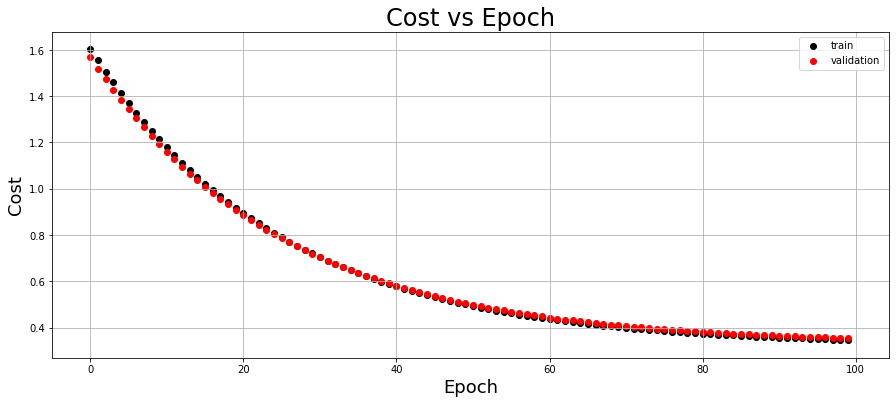

In [43]:
weight_0 = np.random.random()
bias_0 = np.random.random()
alpha = 0.04
num_epochs = 100
validation_ratio = 0.1

weights, biases, cost, cost_val, mean_x, std_x, mean_y, std_y = training \
        (x_train, y_train, weight_0, bias_0, alpha, num_epochs, validation_ratio)

<font color = 'purple'>
    
## Inferencia

Dado el tiempo t el sistema de aprendizaje puede predecir (inferir) el valor de la distancia para ese tiempo.

In [44]:
def inference(x, w, b, x_mean, x_std, y_mean, y_std) :
    x = (x - x_mean) / x_std 
    y = w * x + b
    y = y * y_std + y_mean
    return y

In [45]:
tiempos = [1.65, 2.20, 4.5, 8.7]

for t in tiempos :
    distancia = inference(t,weights[-1], biases[-1], mean_x, std_x, mean_y, std_y)

    print ("Para el tiempo de {0:5.3f} s la distancia inferida es {1:6.3f} cm ".format(t,distancia))

Para el tiempo de 1.650 s la distancia inferida es 24.679 cm 
Para el tiempo de 2.200 s la distancia inferida es 29.488 cm 
Para el tiempo de 4.500 s la distancia inferida es 49.598 cm 
Para el tiempo de 8.700 s la distancia inferida es 86.320 cm 


In [47]:
x_test = data_test[0]
y_test = data_test[1]

In [48]:
x_test = np.squeeze(x_test)

In [49]:
tiempos = x_test[:3]

for t in tiempos :
    distancia = inference(t,weights[-1], biases[-1], mean_x, std_x, mean_y, std_y)

    print ("Para el tiempo de {0:5.3f} s la distancia inferida es {1:6.3f} cm ".format(t,distancia))

Para el tiempo de 0.308 s la distancia inferida es 12.945 cm 
Para el tiempo de 0.030 s la distancia inferida es 10.517 cm 
Para el tiempo de 1.468 s la distancia inferida es 23.084 cm 


Es así que el sistema puede hacer predicciones sobre la posición del objeto dado algún tiempo $t$.